In [24]:
#PACKAGES IMPORTATION

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import sklearn.cluster as cluster
import pickle 


In [5]:
# FILE OPENNING

data=open('/content/page-blocks (1).txt','r').readlines()


space=False 

N=len(data)-1
dataset=[]

In [ ]:
# FITTING DATA IN LISTS AND SO WE DELETE SPACES
 
for i in range(0,N):
    l=[]
    insert=''
    for j in range (len(data[i])):
             
        if (data[i][j]==' ') or (data[i][j]=='\n'):

          space=True

        if (data[i][j]!=' ') and (data[i][j]!='\n'):

          if (space==False):

            insert+=data[i][j]

          if (space==True):
            
            if (data[i][j]=='.'):

              insert='0.'

            else:

              insert=data[i][j]

          if (data[i][j+1]==' ') or (data[i][j+1]=='\n'):

            l.append(insert)
            insert=''

          space=False  
          
          
    dataset.append(l)


    
    
# FITTING DATA INTO COLUMNS
    
height = []
lenght = []
area = []
eccen = []
p_black = []
p_and = []
mean_tr   = []
blackpix = []
blackand = []
wb_trans = []
    
for i in range(0,N):

    
    height.append(dataset[i][0])
    lenght.append(dataset[i][1])
    area.append(dataset[i][2])
    eccen.append(dataset[i][3])
    p_black.append(dataset[i][4])
    p_and.append(dataset[i][5])
    mean_tr.append(dataset[i][6])
    blackpix.append(dataset[i][7])
    blackand.append(dataset[i][8])
    wb_trans.append(dataset[i][9])
    

In [ ]:
# IMPORTING DATA IN A CSV FILE 

csv_data = open("dataset.csv","w")

csv_data.write("height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans\n")

for i in range (N):
    csv_data.write(dataset[i][0]+","+dataset[i][1]+","+dataset[i][2]+","+dataset[i][3]+","+dataset[i][4]+","+dataset[i][5]+","+dataset[i][6]+","+dataset[i][7]+","+dataset[i][8]+","+dataset[i][9]+"\n")

    
csv_data.close()

In [6]:
# DATABASE DISPLAY

dt=pd.read_csv('/content/dataset.csv')
dt



,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4
...,...,...,...,...,...,...,...,...,...,...
5467,1,16,16,16.000,1.000,1.000,16.00,16,16,1
5468,4,524,2096,131.000,0.542,0.603,40.57,1136,1264,28
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104


In [7]:
# SEARCHING MISSING VALUES

dt.info()    # There is no missing value, all columns are filled with 5472 numbers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5472 non-null   int64  
 1   lenght    5472 non-null   int64  
 2   area      5472 non-null   int64  
 3   eccen     5472 non-null   float64
 4   p_black   5472 non-null   float64
 5   p_and     5472 non-null   float64
 6   mean_tr   5472 non-null   float64
 7   blackpix  5472 non-null   int64  
 8   blackand  5472 non-null   int64  
 9   wb_trans  5472 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 427.6 KB


In [8]:
# SUMMARY STATISTICS DISPLAY 

dt.describe()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,10.473684,89.584430,1198.623173,13.756468,0.368527,0.785013,6.218953,365.996162,741.242142,106.682200
std,18.962267,114.725992,4849.793411,30.705990,0.177568,0.170652,69.085329,1270.439956,1881.650138,167.317552
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000
75%,10.000000,107.000000,980.000000,13.625000,0.425250,0.927000,3.000000,284.000000,718.000000,126.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000


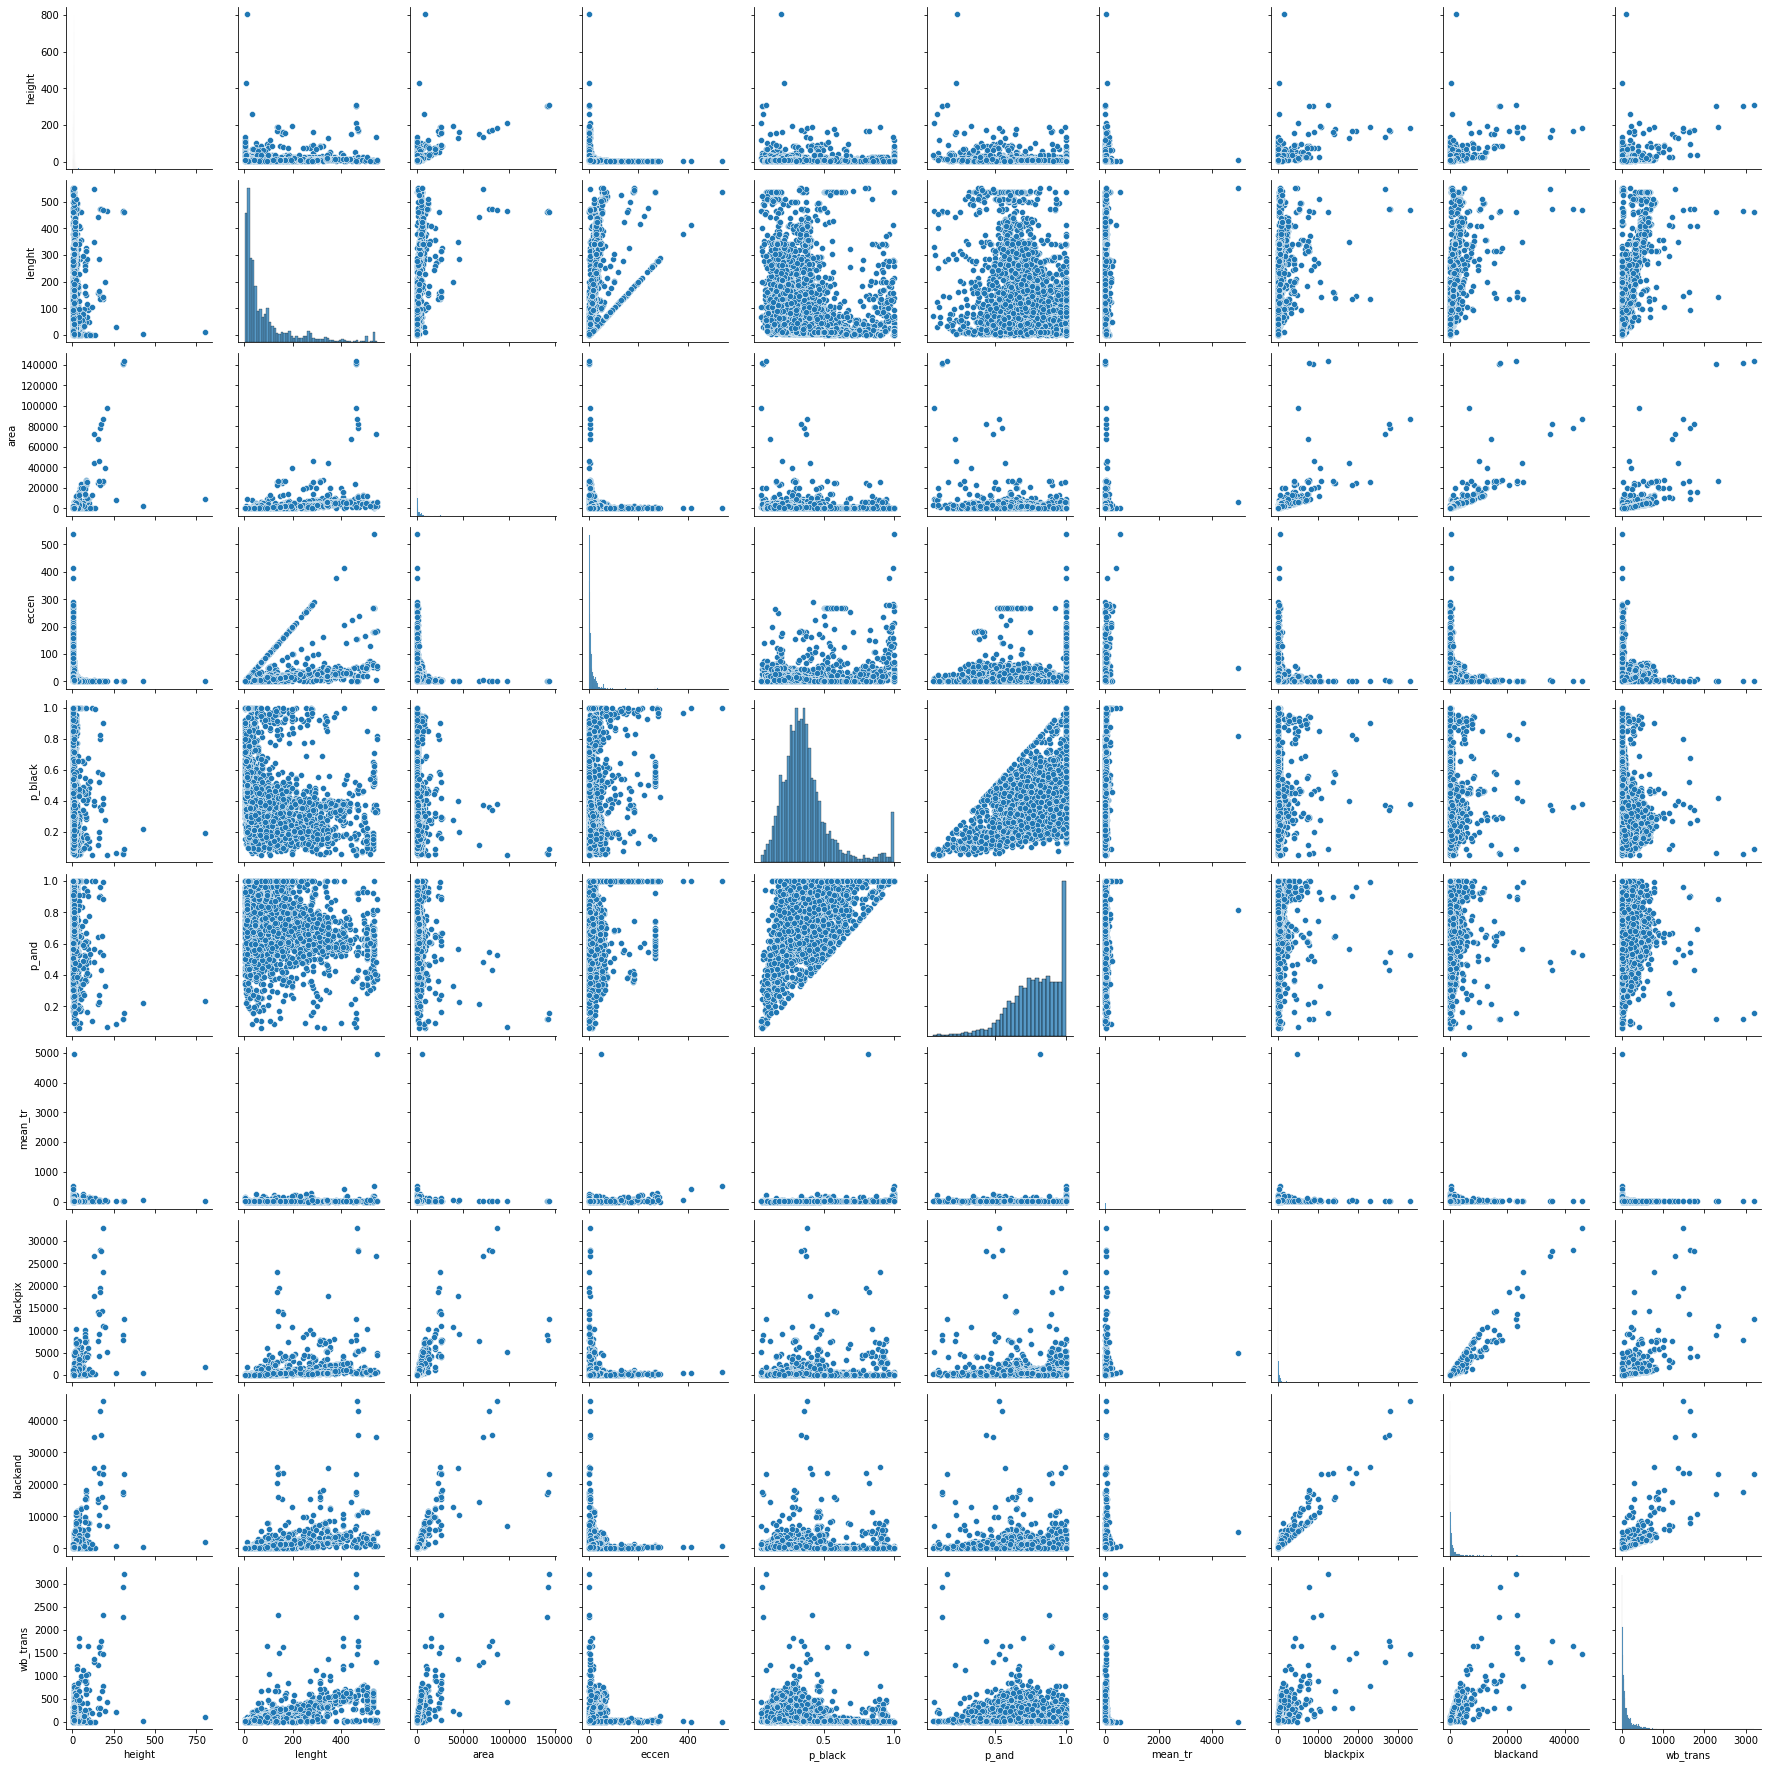

In [34]:
# Plot correlations between features

sb.pairplot(dt[['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']])


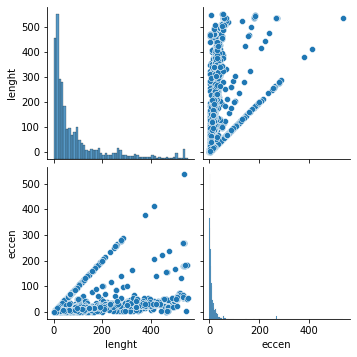

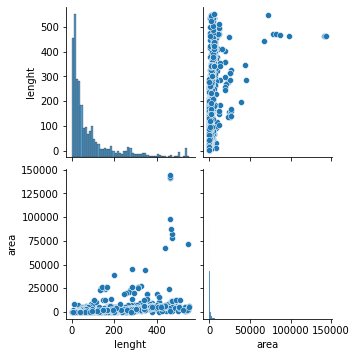

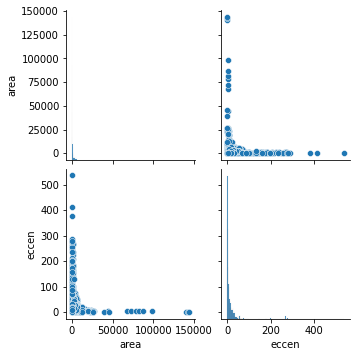

In [12]:
# Plot correlations between thus which seem to be the less correlate features


sb.pairplot(dt[['lenght','eccen']])

sb.pairplot(dt[['lenght','area']])

sb.pairplot(dt[['area','eccen']])

In [28]:
# Building and running the model on the hyper parameters found 

kmeans = cluster.KMeans(n_clusters=5,random_state = 5)
kmeans = kmeans.fit(dt[['lenght','area']])



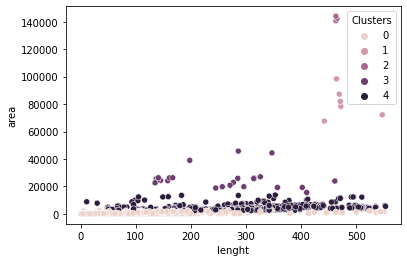

In [29]:
# Plotting model outputs

kmeans.cluster_centers_

dt['Clusters']=kmeans.labels_

dt.head()

dt['Clusters'].value_counts()

sb.scatterplot(x='lenght',y='area',hue='Clusters',data=dt)

In [30]:
# Building and running a new model with other hyper parameters

kmeans = cluster.KMeans(n_clusters=5,random_state = 5)
kmeans = kmeans.fit(dt[['lenght','eccen']])


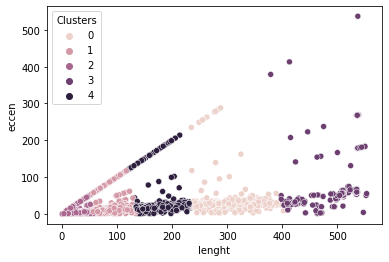

In [31]:
# Plotting model outputs

kmeans.cluster_centers_

dt['Clusters']=kmeans.labels_

dt.head()

dt['Clusters'].value_counts()

sb.scatterplot(x='lenght',y='eccen',hue='Clusters',data=dt)

In [32]:
# Building and running a new model with other hyper parameters

kmeans = cluster.KMeans(n_clusters=5,random_state = 5)
kmeans = kmeans.fit(dt[['area','eccen']])


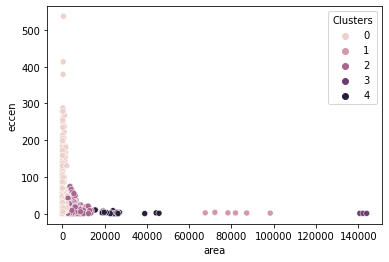

In [33]:
kmeans.cluster_centers_

dt['Clusters']=kmeans.labels_

dt.head()

dt['Clusters'].value_counts()

sb.scatterplot(x='area',y='eccen',hue='Clusters',data=dt)

In [27]:
# Saving the model in order to launch the flask app

pickle.dump(kmeans,open('/content/model.pkl','wb'))